In [1]:
import json, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

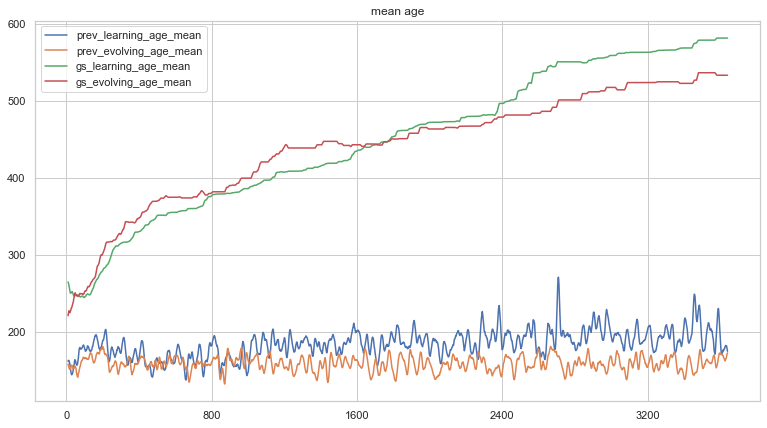

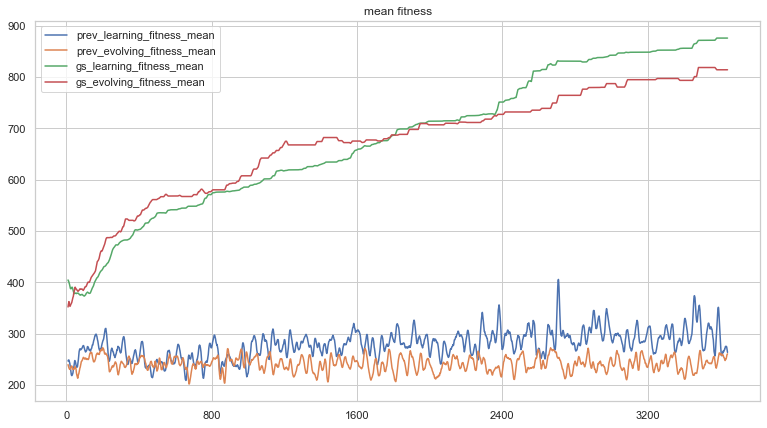

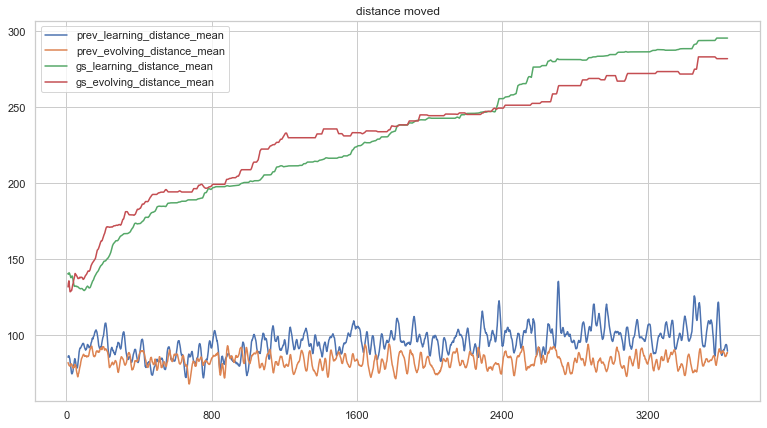

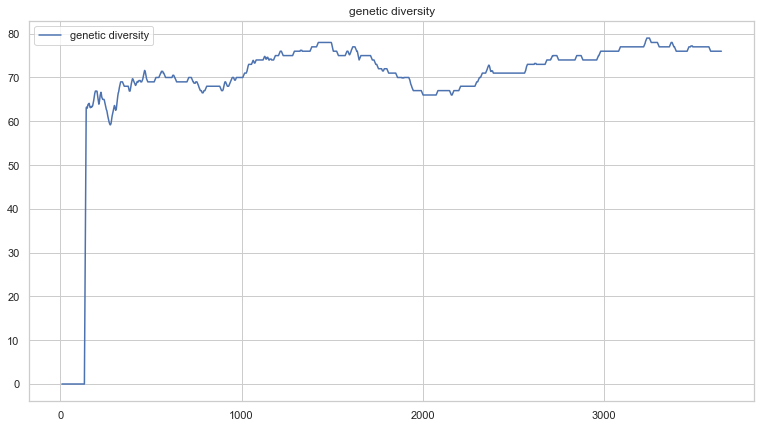

In [32]:
stats = {}
with open("alien_ecology_stats/stats.json", "r") as f:
    stats = json.loads(f.read())

am = [x for x in stats.keys() if "age_mean" in x]
fm = [x for x in stats.keys() if "fitness_mean" in x]
dm = [x for x in stats.keys() if "distance_mean" in x]
tgs = [x for x in stats.keys() if "in_top_" in x]
lad = [x for x in stats.keys() if "learning_action" in x]
ead = [x for x in stats.keys() if "evolving_action" in x]

show = {
        'mean age': am,
        'mean fitness': fm,
        'distance moved': dm,
        'genetic diversity': ["genetic diversity"],
       }

for title, group in show.items():
    if len(group) < 1:
        continue
    min_p = min(len(stats[l]) for l in group)
    #min_p = min(5000, min_p)
    plot_data = {}
    for label in group:
        plot_data[label] = stats[label][-min_p:]
    data = pd.DataFrame(plot_data)
    fig = plt.figure(figsize=(13,7))
    data = data.rolling(10).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_title(title)
    plt.show()

In [33]:
import pickle
from collections import Counter

with open("alien_ecology_save/genome_store.pkl", "rb") as f:
    genome_store = pickle.load(f)

print(len(genome_store))
print("Unique genomes:")
unique = set()
counts = Counter()
ages = {}
fitness = {}
for index in range(len(genome_store)):
    gen = genome_store[index][0]
    msg = ""
    for g in gen:
        c = "Z"
        if int(g) == -1:
            c = "M"
        elif int(g) == 1:
            c = "P"
        msg += c
    unique.add(msg)
    counts[msg] += 1
    ages[msg] = genome_store[index][2]
    fitness[msg] = genome_store[index][1]
    
print(len(unique))
for x, c in counts.most_common():
    print("count:", c, "age:", ages[x], "fitness:", fitness[x])
    print(u)

100
Unique genomes:
76
count: 8 age: 494 fitness: 760.9790213718009
ZPZZPPZPZMZMZZMZPZZZZMPPZZMZMPZZZZZZZPMZZZMZZZZZZZZZZZZPPZZZPZZZZZMZZZMZZZZZPZZPMPZPZZZPZZPZZPPZPZZZZZPZZZZZZZMZZMMMZZPPZZZZPZPZZPZPZZZZZZZZZZPZZPMZMZMPZZZZZZPZZPPZPPZZZMMZZZZZZMPPZMPZZZMZZZZZMZZZZZZZMMMZPMZZZZZZZZZZZZMMZMZM
count: 5 age: 544 fitness: 846.5297598410737
ZPZZPPZPZMZMZZMZPZZZZMPPZZMZMPZZZZZZZPMZZZMZZZZZZZZZZZZPPZZZPZZZZZMZZZMZZZZZPZZPMPZPZZZPZZPZZPPZPZZZZZPZZZZZZZMZZMMMZZPPZZZZPZPZZPZPZZZZZZZZZZPZZPMZMZMPZZZZZZPZZPPZPPZZZMMZZZZZZMPPZMPZZZMZZZZZMZZZZZZZMMMZPMZZZZZZZZZZZZMMZMZM
count: 4 age: 487 fitness: 724.1292962965299
ZPZZPPZPZMZMZZMZPZZZZMPPZZMZMPZZZZZZZPMZZZMZZZZZZZZZZZZPPZZZPZZZZZMZZZMZZZZZPZZPMPZPZZZPZZPZZPPZPZZZZZPZZZZZZZMZZMMMZZPPZZZZPZPZZPZPZZZZZZZZZZPZZPMZMZMPZZZZZZPZZPPZPPZZZMMZZZZZZMPPZMPZZZMZZZZZMZZZZZZZMMMZPMZZZZZZZZZZZZMMZMZM
count: 3 age: 488 fitness: 728.651872673381
ZPZZPPZPZMZMZZMZPZZZZMPPZZMZMPZZZZZZZPMZZZMZZZZZZZZZZZZPPZZZPZZZZZMZZZMZZZZZPZZPMPZPZZZPZZPZZPPZPZZZZZPZZZZZZZMZZMMMZZPPZZZ